In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent  # part de /notebooks → remonte à la racine
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))


import pandas as pd
from src.utils.path import PROCESSED_DIR, PRED_DIR
import matplotlib.pyplot as plt

from src.utils.tools import reconstruct_prices

## Dataframe informations

In [2]:
DATA_PATH = PROCESSED_DIR / "dataset_full.parquet"

df = pd.read_parquet(DATA_PATH)
print(df.columns) # Le df est indexé sur la date 
print(df['MA_5_CAC40'])



Index(['Close_CAC40', 'High_CAC40', 'Low_CAC40', 'Open_CAC40', 'Volume_CAC40',
       'Close_STOXX600', 'High_STOXX600', 'Low_STOXX600', 'Open_STOXX600',
       'Volume_STOXX600',
       ...
       'Close_EUROSTOXX50_lag1', 'Close_EUROSTOXX50_lag2',
       'Close_STOXX600_lag1', 'Close_STOXX600_lag2', 'Return_CAC40',
       'Return_CAC40_t+1', 'Return_EUROSTOXX50', 'Return_EUROSTOXX50_t+1',
       'Return_STOXX600', 'Return_STOXX600_t+1'],
      dtype='object', length=147)
Date
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-08            NaN
2018-01-09    5445.415918
                 ...     
2025-05-08    7703.321973
2025-05-09    7697.975977
2025-05-12    7722.409961
2025-05-13    7757.791992
2025-05-14    7801.764063
Name: MA_5_CAC40, Length: 1850, dtype: float64


## Dataframe visualization
### Index plots

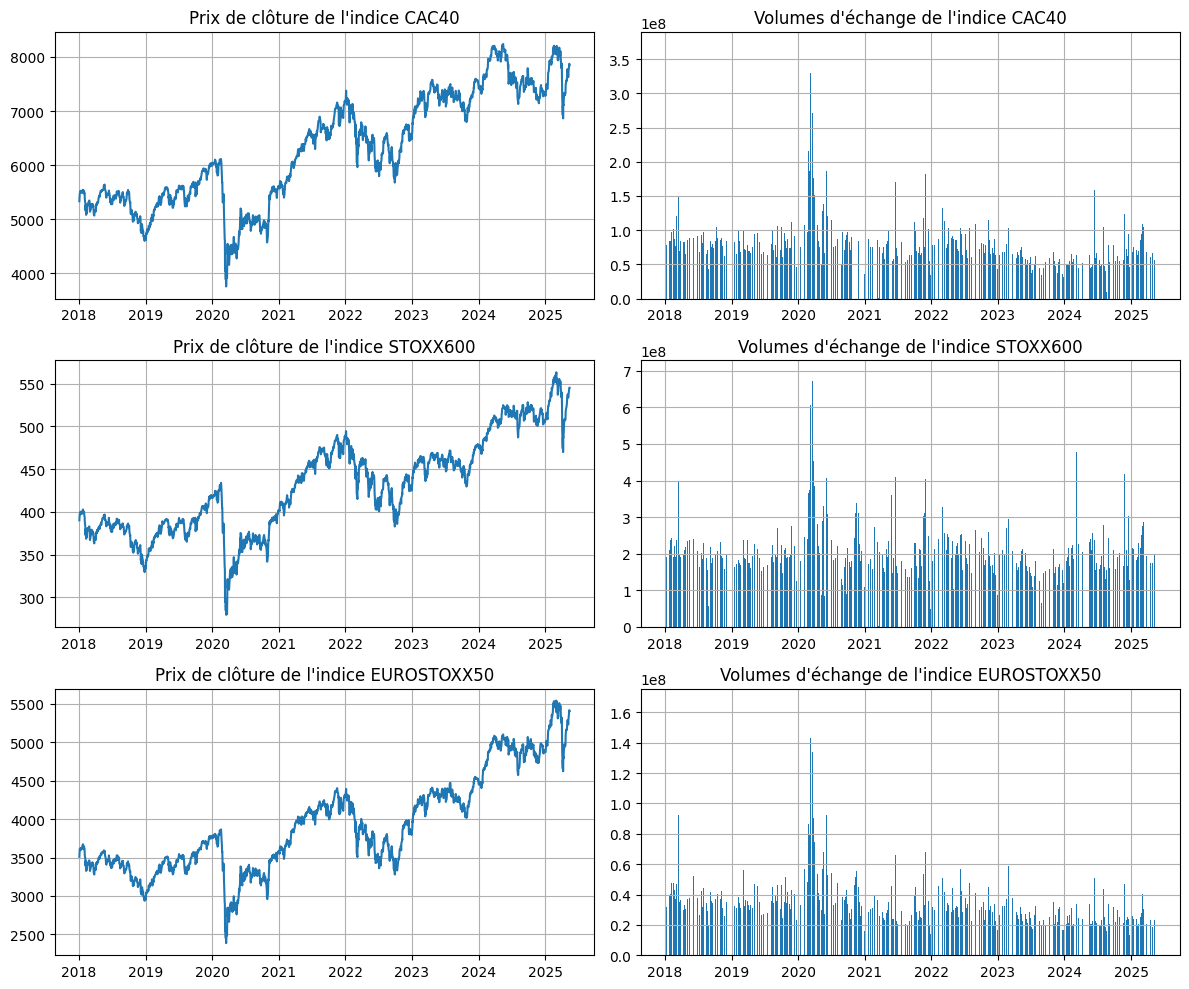

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [5]:
closing_prices = ["Close_CAC40", "Close_STOXX600", "Close_EUROSTOXX50"]
volumes = ["Volume_CAC40", "Volume_STOXX600", "Volume_EUROSTOXX50"]
index = ["CAC40", "STOXX600", "EUROSTOXX50"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i in range(3):
    axes[i, 0].plot(df.index, df[closing_prices[i]])
    axes[i, 0].set_title(f"Prix de clôture de l'indice {index[i]}")
    axes[i, 0].grid(True)

    axes[i, 1].bar(df.index, df[volumes[i]])
    axes[i, 1].set_title(f"Volumes d'échange de l'indice {index[i]}")
    axes[i, 1].grid(True)

    plt.tight_layout()
plt.show()
missing_dates = df[df["Volume_STOXX600"].isna()]
print(missing_dates.index)


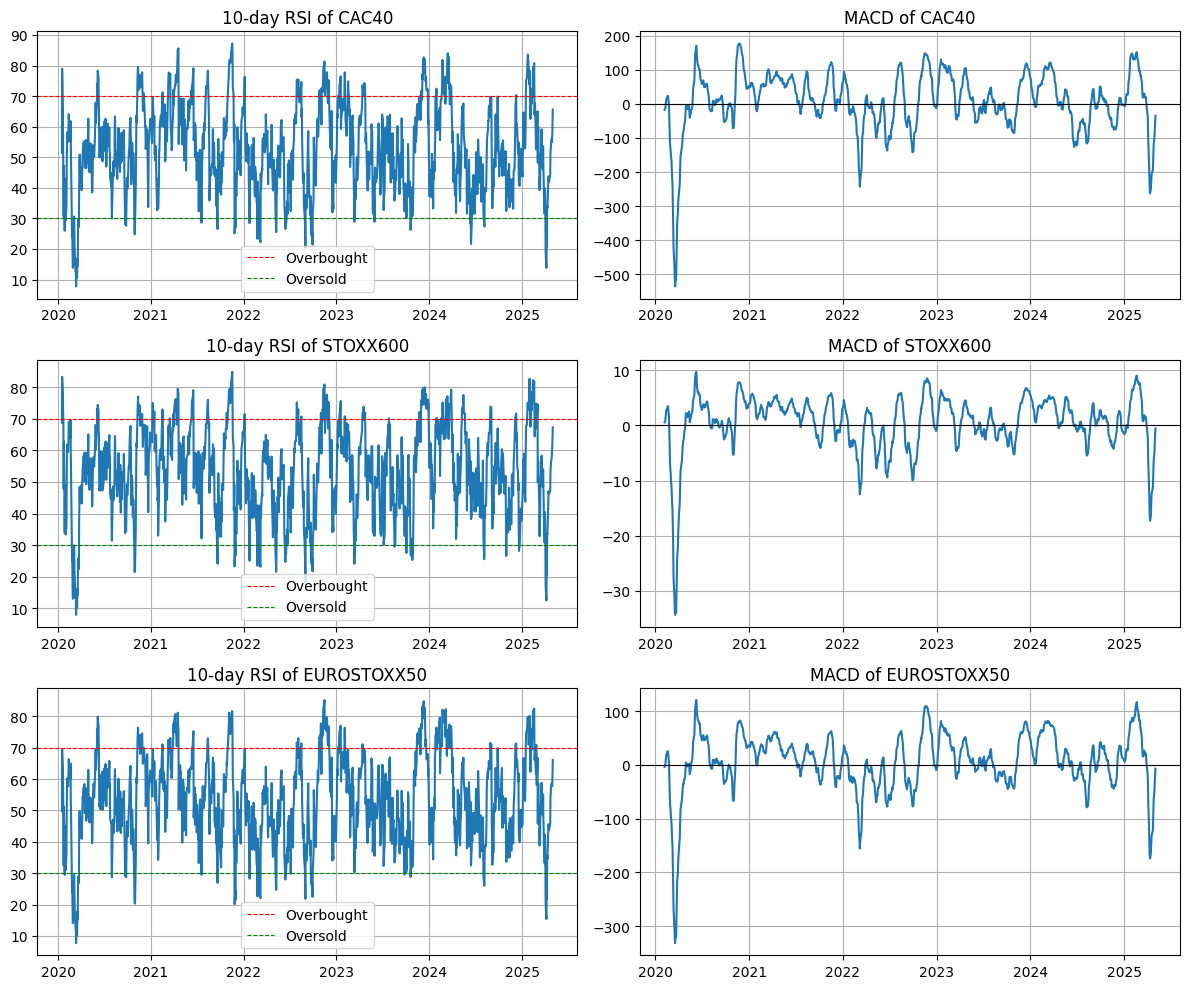

In [5]:
rsi_columns = ["RSI_10_CAC40", "RSI_10_STOXX600", "RSI_10_EUROSTOXX50"]
macd_columns = ["MACD_CAC40", "MACD_STOXX600", "MACD_EUROSTOXX50"]
index_names = ["CAC40", "STOXX600", "EUROSTOXX50"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i in range(3):
    # RSI plot
    axes[i, 0].plot(df.index, df[rsi_columns[i]])
    axes[i, 0].set_title(f"10-day RSI of {index_names[i]}")
    axes[i, 0].axhline(70, color='r', linestyle='--', linewidth=0.8, label="Overbought")
    axes[i, 0].axhline(30, color='g', linestyle='--', linewidth=0.8, label="Oversold")
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # MACD plot
    axes[i, 1].plot(df.index, df[macd_columns[i]])
    axes[i, 1].set_title(f"MACD of {index_names[i]}")
    axes[i, 1].axhline(0, color='black', linewidth=0.8)
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


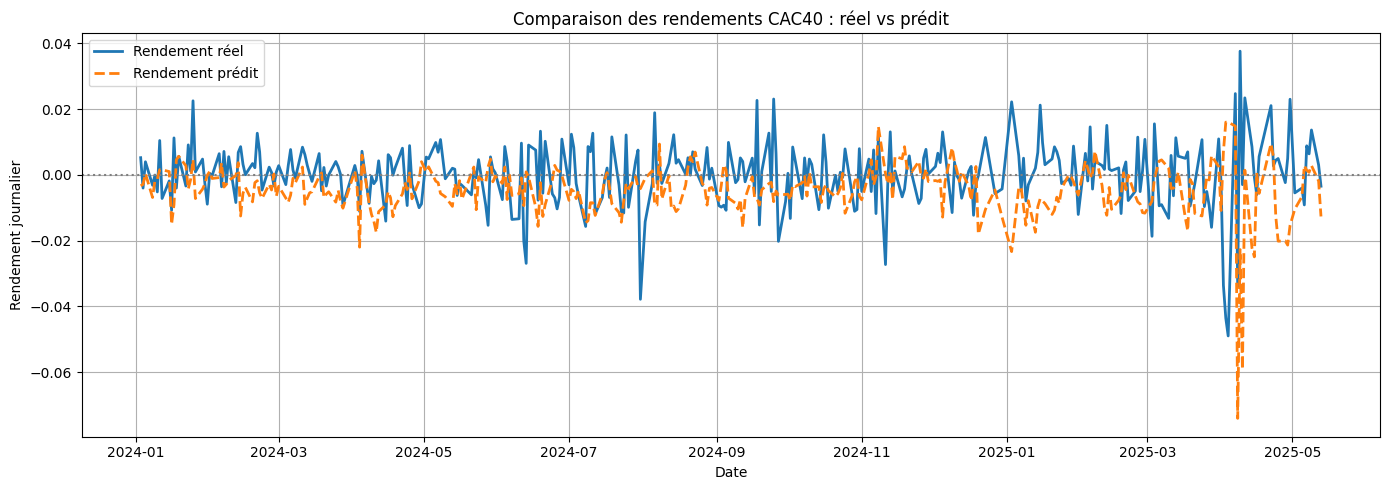

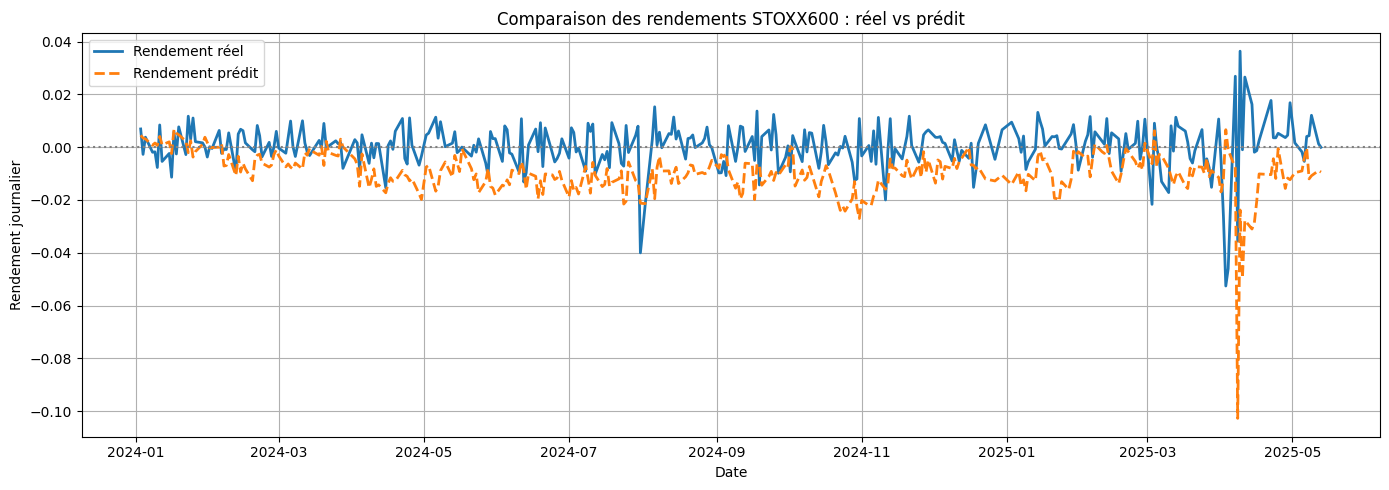

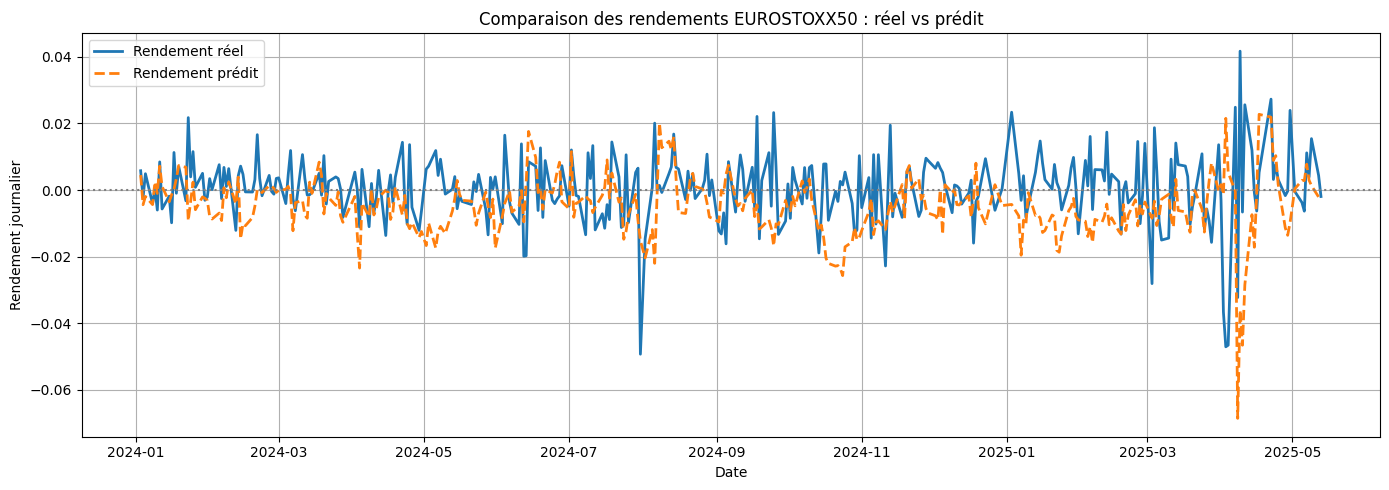

In [2]:

y_test = pd.read_parquet(PRED_DIR / "y_test_df.parquet")
y_pred_df = pd.read_parquet(PRED_DIR / "y_pred_df.parquet")


for index in ["CAC40", "STOXX600", "EUROSTOXX50"]:
    plt.figure(figsize=(14, 5))
    plt.plot(y_test.index, y_test[f"Return_{index}_t+1"], label="Rendement réel", linewidth=2)
    plt.plot(y_test.index, y_pred_df[f"Return_{index}_t+1"], label="Rendement prédit", linestyle="--", linewidth=2)
    plt.axhline(0, color="gray", linestyle=":")
    plt.title(f"Comparaison des rendements {index} : réel vs prédit")
    plt.xlabel("Date")
    plt.ylabel("Rendement journalier")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


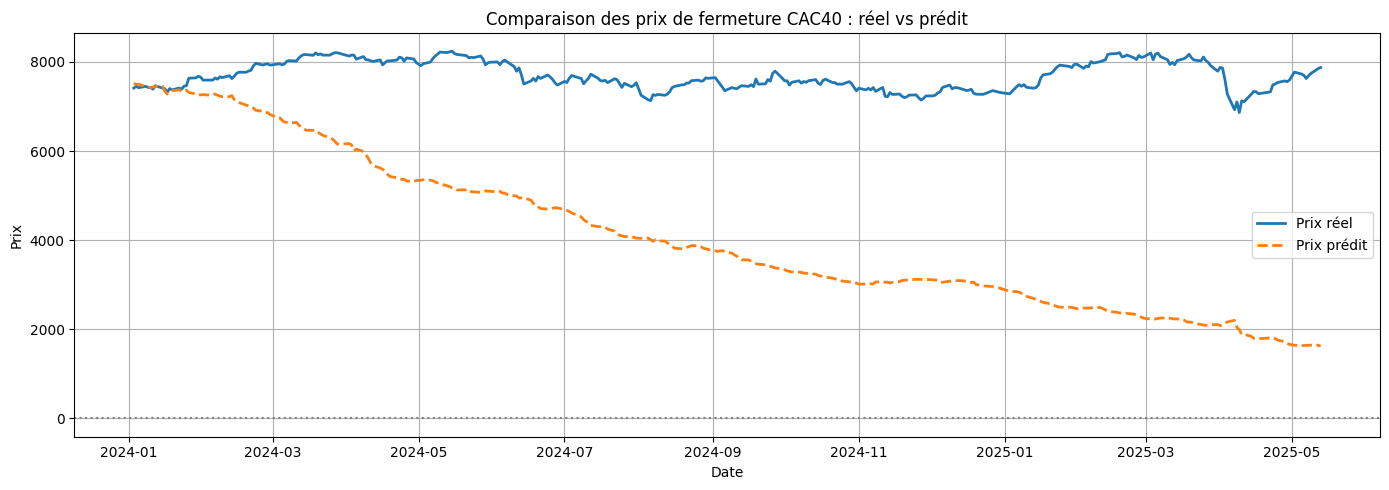

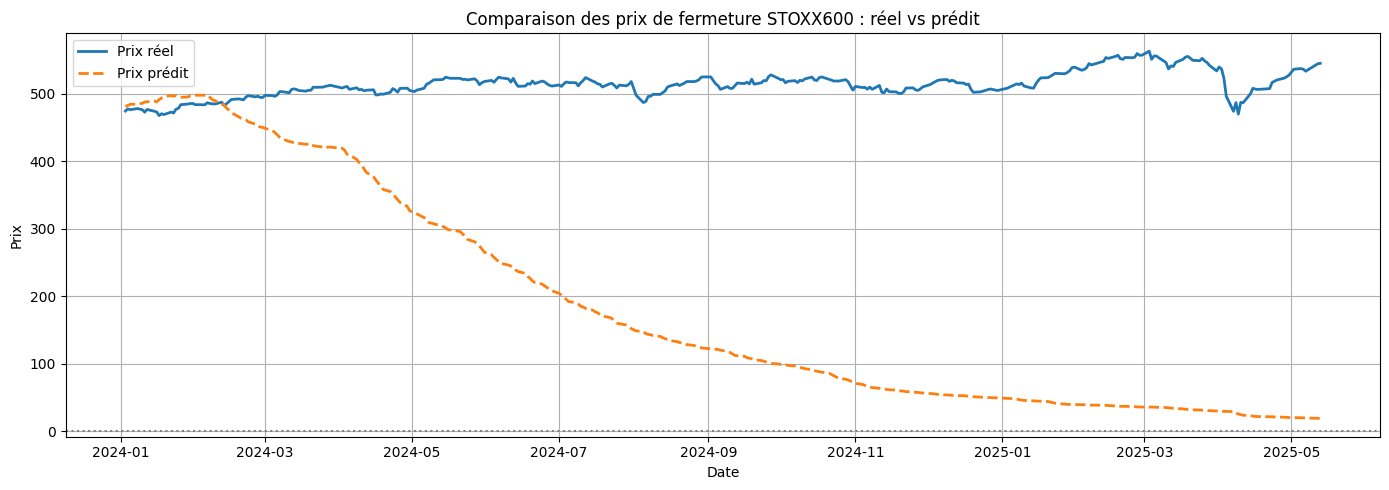

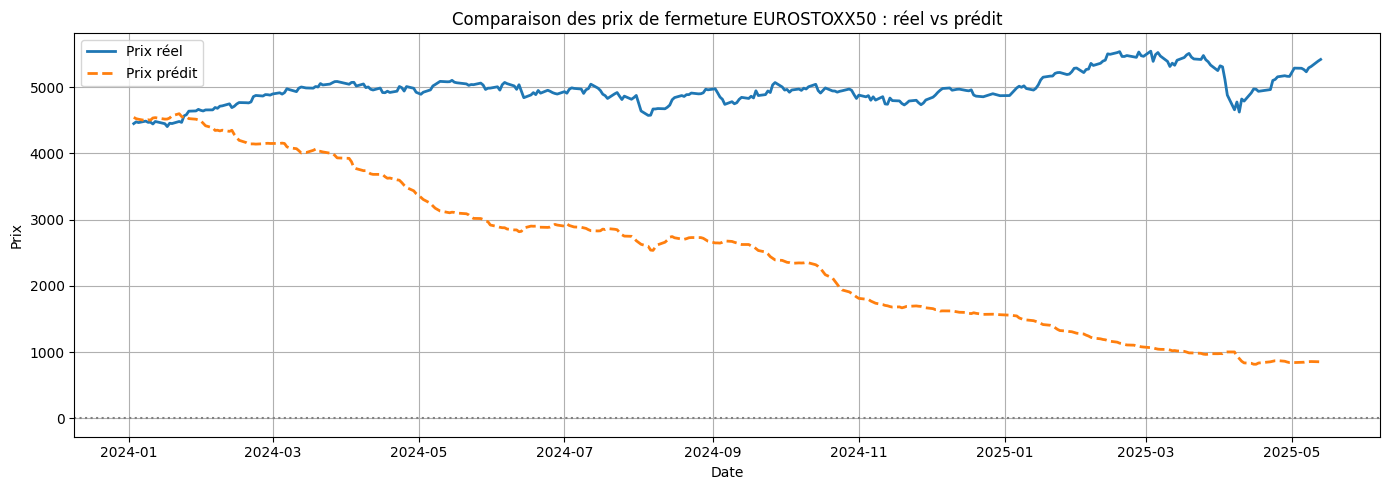

In [3]:
y_test = pd.read_parquet(PRED_DIR / "y_test_df.parquet")
y_pred_df = pd.read_parquet(PRED_DIR / "y_pred_df.parquet")
closing_prices = pd.read_parquet(PRED_DIR / "closing_prices.parquet")
initial_price = {"CAC40" : 7543.18017578125, "STOXX600" : 479.0199890136719, "EUROSTOXX50" : 4521.64990234375}

for index in ["CAC40", "STOXX600", "EUROSTOXX50"]:
    plt.figure(figsize=(14, 5))
    plt.plot(y_test.index, closing_prices[f"Close_{index}"], label="Prix réel", linewidth=2)
    plt.plot(y_test.index, reconstruct_prices(initial_price[index], y_pred_df[f"Return_{index}_t+1"]), label="Prix prédit", linestyle="--", linewidth=2)
    plt.axhline(0, color="gray", linestyle=":")
    plt.title(f"Comparaison des prix de fermeture {index} : réel vs prédit")
    plt.xlabel("Date")
    plt.ylabel("Prix")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
y_pred_df.describe()

